# Czion 강의

## 데이터 분석

### Library

In [1]:
import os, glob, shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

#안하면 오류남
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore')

In [2]:
train_data = pd.read_csv("../Data/train.csv")
display(train_data)

,index,file_name,class,state,label
0,0,10000.png,transistor,good,transistor-good
1,1,10001.png,capsule,good,capsule-good
2,2,10002.png,transistor,good,transistor-good
3,3,10003.png,wood,good,wood-good
4,4,10004.png,bottle,good,bottle-good
...,...,...,...,...,...
2995,2995,12995.png,screw,good,screw-good
2996,2996,12996.png,wood,good,wood-good
2997,2997,12997.png,zipper,good,zipper-good
2998,2998,12998.png,tile,oil,tile-oil


#### Class 확인

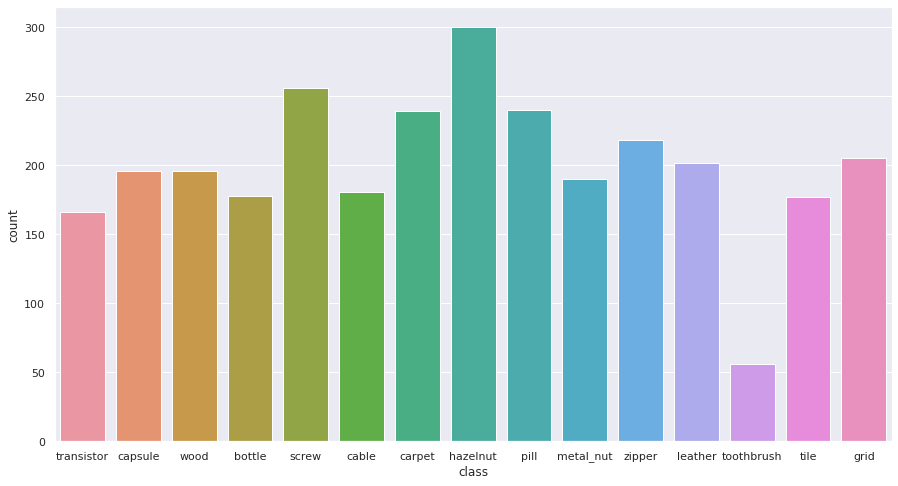

In [3]:
sns.set(rc = {'figure.figsize' : (15,8)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="class",data=train_data)

> class 별로 학습 데이터의 차이가 발생한다. 특히 toothbrush의 데이터 갯수가 많이 없다.

#### Data good, bed로 변환

In [4]:
train_bed = train_data.copy()
bad = [l[1][3] if l[1][3] == 'good' else 'bad' for l in train_bed.iterrows()]
train_bed['state'] = bad

##### 시각화

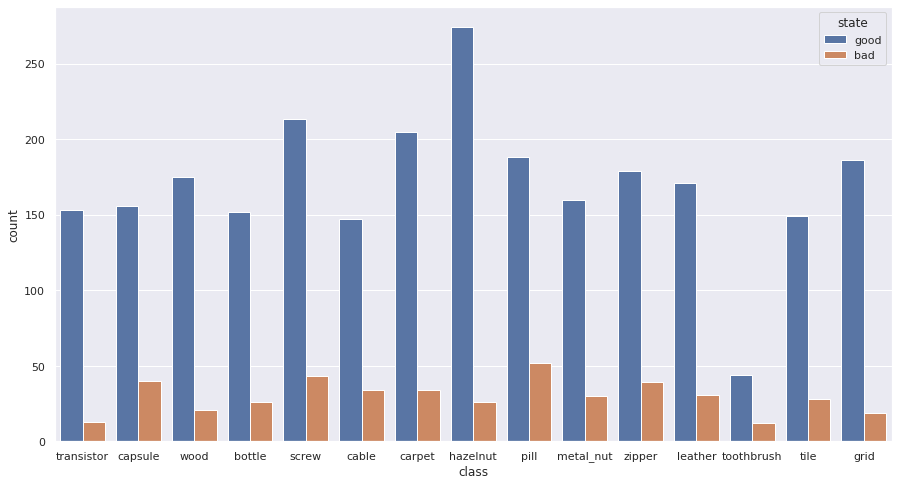

In [5]:
sns.set(rc = {'figure.figsize' : (15,8)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="class",hue="state",data=train_bed)

> 전체적으로 good의 데이터 갯수가 많다.<br>
> 특히 bad의 갯수는 또 세부적으로 나누어져 있어서 문제가 발생한다. <br>
> 해결 방법을 고안해야함 ex) 데이터증강

#### Class 별로 데이터 확인

In [6]:
class_unique = train_data['class'].unique()
train_data_columns = train_data.columns
train_data_class = []

for i, unique in enumerate(class_unique):
    train_data_class.append(pd.DataFrame([l[1]  for l in train_data.iterrows() if l[1][2] == unique],columns = train_data_columns))

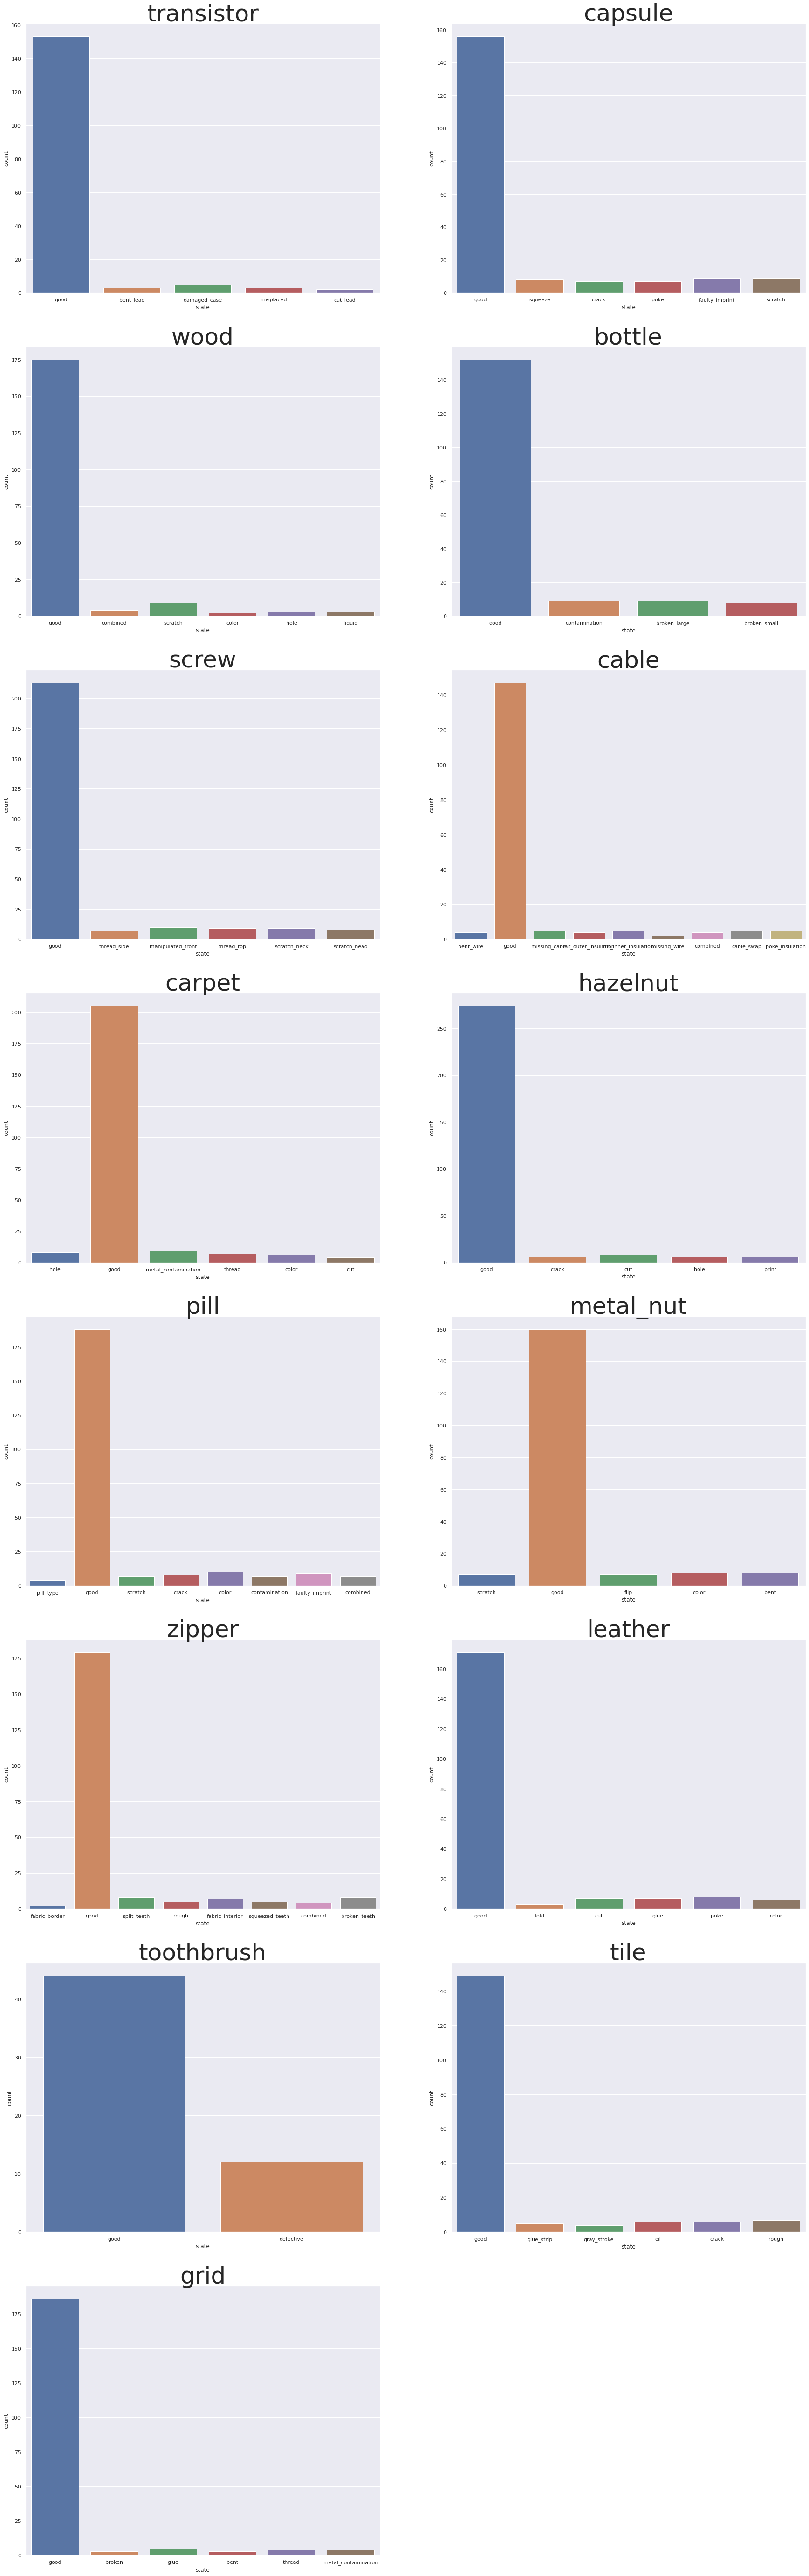

In [7]:
sns.set(rc = {'figure.figsize' : (30,100)})
fig = plt.figure()
for i in range(1,16):
    axes = fig.add_subplot(8,2,i)
    sns.countplot(x="state",data=train_data_class[i-1]).set_title(class_unique[i-1], fontsize = 50)

> class 별로 상태의 값이 더욱 심하게 데이터 불균형이 이루어져 있는 것을 확인하였다. <br>
> 더욱의 class별 상태의 값또한 state의 종류가 다양한것을 확인하였다.

### TrainDataset 만들기

In [8]:
# 전체적으로 train할 데이터셋
train_save_bad = train_data.copy()

bad = [l[1][4] if l[1][3] == 'good' else l[1][2]+'-bad' for l in train_save_bad.iterrows()]
train_save_bad['label'] = bad
train_save_bad.to_csv('../Data/train_df_bad.csv', index=False)

In [17]:
datas = []

In [9]:
for i in class_unique:
    train_data[train_data['class']==i].to_csv(f'../Data/{i}_df.csv', index=False)

In [18]:
for i in class_unique[:5]:
      datas.append(train_data[train_data['class']==i])
        

In [20]:
a = pd.concat([datas[1],datas[2],datas[3],datas[4]])

a.to_csv(f'../Data/asemble_df.csv', index=False)

In [22]:
len(a["label"].unique())

22